In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import model_selection, preprocessing
#import xgboost as xgb
color = sns.color_palette()

%matplotlib inline

pd.options.mode.chained_assignment = None  # default='warn'
pd.set_option('display.max_columns', 500)
sns.set(style="white", color_codes=True)

In [2]:
pd.set_option('display.max_rows' , 300)

In [3]:
#Load Data
train_house_df = pd.read_csv('train.csv/train.csv')
test_house_df = pd.read_csv('test.csv/test.csv')
macro_df = pd.read_csv('macro.csv/macro.csv')

In [4]:
macro_df.shape

(2484, 100)

In [5]:
train_house_df.shape

(30471, 292)

In [6]:
train_house_df['price_doc'].describe()

count    3.047100e+04
mean     7.123035e+06
std      4.780111e+06
min      1.000000e+05
25%      4.740002e+06
50%      6.274411e+06
75%      8.300000e+06
max      1.111111e+08
Name: price_doc, dtype: float64

In [7]:
test_house_df.shape

(7662, 291)

In [8]:
print(len(train_house_df[train_house_df["floor"]>50]))
print(len(train_house_df[train_house_df["full_sq"]>300]))
print(len(train_house_df[train_house_df["life_sq"]>200]))
print(len(train_house_df[train_house_df["max_floor"]>100]))
print(len( train_house_df[train_house_df["num_room"]>10]))
print(len(train_house_df[train_house_df["kitch_sq"]>100]))

1
14
14
1
2
9


In [9]:
train_house_df = train_house_df.drop(train_house_df.index[train_house_df["full_sq"]>200])
train_house_df = train_house_df.drop(train_house_df.index[train_house_df["life_sq"]>200] )
train_house_df = train_house_df.drop(train_house_df.index[train_house_df["floor"]>50])
train_house_df = train_house_df.drop(train_house_df.index[train_house_df["max_floor"]>100] )
train_house_df = train_house_df.drop(train_house_df.index[train_house_df["num_room"]>10] )
train_house_df = train_house_df.drop(train_house_df.index[train_house_df["kitch_sq"]>100] )


In [10]:
print(len(train_house_df[train_house_df["floor"]>50]))
print(len(train_house_df[train_house_df["full_sq"]>300]))
print(len(train_house_df[train_house_df["life_sq"]>200]))
print(len(train_house_df[train_house_df["max_floor"]>100]))
print(len( train_house_df[train_house_df["num_room"]>10]))
print(len(train_house_df[train_house_df["kitch_sq"]>100]))

0
0
0
0
0
0


In [11]:
train_house_df.shape

(30413, 292)

In [12]:
test_house_df.shape

(7662, 291)

In [93]:
label_df = train_house_df['price_doc']

feature_df = train_house_df.drop(['price_doc'], axis=1 )

merge_df = feature_df.append(test_house_df)

imp_column=['full_sq' , 'life_sq' , 'floor' , 'max_floor' , 'num_room' , 'kitch_sq' , 'state' , 'build_year' , 'material']

#merge_df[imp_column].describe()

merge_df['build_year'][merge_df['build_year'] <= 1600]=2014

merge_df['build_year'][merge_df['build_year'] > 2050]=2014

merge_df['house_age'] = 2020  - merge_df['build_year']

imp_column.append('house_age')


In [94]:
train_house_df[['full_sq' , 'life_sq' , 'floor' , 'max_floor' , 'num_room' , 'kitch_sq' , 'state' , 'build_year' , 'material']].describe()

,full_sq,life_sq,floor,max_floor,num_room,kitch_sq,state,build_year,material
count,30413.000000,24036.000000,30246.000000,20860.000000,20860.000000,20860.000000,16878.000000,1.683200e+04,20860.000000
mean,53.729885,33.815111,7.667096,12.552828,1.906136,5.962176,2.106944,3.070220e+03,1.825983
std,20.684685,18.459489,5.298543,6.708632,0.832723,4.802485,0.879812,1.545436e+05,1.480466
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000e+00,1.000000
25%,38.000000,20.000000,3.000000,9.000000,1.000000,1.000000,1.000000,1.966000e+03,1.000000
50%,49.000000,30.000000,7.000000,12.000000,2.000000,6.000000,2.000000,1.979000e+03,1.000000
75%,63.000000,43.000000,11.000000,17.000000,2.000000,9.000000,3.000000,2.005000e+03,2.000000
max,199.000000,197.000000,44.000000,99.000000,10.000000,97.000000,33.000000,2.005201e+07,6.000000


In [299]:
train_house_df['full_sq'][train_house_df['full_sq']==0.000].count()

2

In [301]:
test_house_df[test_house_df['full_sq']==0.000]

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,sub_area,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_quota,preschool_education_centers_raion,children_school,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25,culture_objects_top_25_raion,shopping_centers_raion,office_raion,thermal_power_plant_raion,incineration_raion,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,nuclear_reactor_raion,detention_facility_raion,full_all,male_f,female_f,young_all,young_male,young_female,work_all,work_male,work_female,ekder_all,ekder_male,ekder_female,0_6_all,0_6_male,0_6_female,7_14_all,7_14_male,7_14_female,0_17_all,0_17_male,0_17_female,16_29_all,16_29_male,16_29_female,0_13_all,0_13_male,0_13_female,raion_build_count_with_material_info,build_count_block,build_count_wood,build_count_frame,build_count_brick,build_count_monolith,build_count_panel,build_count_foam,build_count_slag,build_count_mix,raion_build_count_with_builddate_info,build_count_before_1920,build_count_1921-1945,build_count_1946-1970,build_count_1971-1995,build_count_after_1995,ID_metro,metro_min_avto,metro_km_avto,metro_min_walk,metro_km_walk,kindergarten_km,school_km,park_km,green_zone_km,industrial_km,water_treatment_km,cemetery_km,incineration_km,railroad_station_walk_km,railroad_station_walk_min,ID_railroad_station_walk,railroad_station_avto_km,railroad_station_avto_min,ID_railroad_station_avto,public_transport_station_km,public_transport_station_min_walk,water_km,water_1line,mkad_km,ttk_km,sadovoe_km,bulvar_ring_km,kremlin_km,big_road1_km,ID_big_road1,big_road1_1line,big_road2_km,ID_big_road2,railroad_km,railroad_1line,zd_vokzaly_avto_km,ID_railroad_terminal,bus_terminal_avto_km,ID_bus_terminal,oil_chemistry_km,nuclear_reactor_km,radiation_km,power_transmission_line_km,thermal_power_plant_km,ts_km,big_market_km,market_shop_km,fitness_km,swim_pool_km,ice_rink_km,stadium_km,basketball_km,hospice_morgue_km,detention_facility_km,public_healthcare_km,university_km,workplaces_km,shopping_centers_km,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,mosque_km,theater_km,museum_km,exhibition_km,catering_km,ecology,green_part_500,prom_part_500,office_count_500,office_sqm_500,trc_count_500,trc_sqm_500,cafe_count_500,cafe_sum_500_min_price_avg,cafe_sum_500_max_price_avg,cafe_avg_price_500,cafe_count_500_na_price,cafe_count_500_price_500,cafe_count_500_price_1000,cafe_count_500_price_1500,cafe_count_500_price_2500,cafe_count_500_price_4000,cafe_count_500_price_high,big_church_count_500,church_count_500,mosque_count_500,leisure_count_500,sport_count_500,market_count_500,green_part_1000,prom_part_1000,office_count_1000,office_sqm_1000,trc_count_1000,trc_sqm_1000,cafe_count_1000,cafe_sum_1000_min_price_avg,cafe_sum_1000_max_price_avg,cafe_avg_price_1000,cafe_count_1000_na_price,cafe_count_1000_price_500,cafe_count_1000_price_1000,cafe_count_1000_price_1500,cafe_count_1000_price_2500,cafe_count_1000_price_4000,cafe_count_1000_price_high,big_church_count_1000,church_count_1000,mosque_count_1000,leisure_count_1000,sport_count_1000,market_count_1000,green_part_1500,prom_part_1500,office_count_1500,office_sqm_1500,trc_count_1500,trc_sqm_1500,cafe_count_1500,cafe_sum_1500_min_price_avg,cafe_sum_1500_max_price_avg,cafe_avg_price_1500,cafe_count_1500_na_price,cafe_count_1500_price_500,cafe_count_1500_price_1000,cafe_count_1500_price_1500,cafe_count_1500_price_2500,cafe_count_1500_price_4000,cafe_count_1500_price_high,big_church_count_1500,church_count_1500,mosque_count_1500,leisure_count_1500,sport_count_1500,market_count_1500,green_part_2000,prom_part_2000,office_count_2000,office_sqm_2000,trc_count_2000,trc_sqm_2000,cafe_count_2000,cafe_sum_2000_min_price_avg,cafe_sum_2000_max_price_av

In [95]:
test_house_df[['full_sq' , 'life_sq' , 'floor' , 'max_floor' , 'num_room' , 'kitch_sq' , 'state' , 'build_year' , 'material']].describe()

,full_sq,life_sq,floor,max_floor,num_room,kitch_sq,state,build_year,material
count,7662.000000,6486.000000,7662.000000,7662.000000,7662.000000,7662.000000,6968.000000,6613.000000,7662.000000
mean,53.701164,32.660037,7.652571,12.591099,1.876403,6.938662,1.985792,1820.888099,1.854216
std,20.104320,22.737855,5.099418,6.659291,0.835665,25.579688,0.820086,552.993964,1.517171
min,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
25%,39.200000,19.900000,4.000000,9.000000,1.000000,1.000000,1.000000,1966.000000,1.000000
50%,50.410000,30.400000,7.000000,14.000000,2.000000,7.000000,2.000000,1982.000000,1.000000
75%,63.300000,41.800000,11.000000,17.000000,2.000000,9.500000,3.000000,2011.000000,2.000000
max,403.000000,869.000000,41.000000,48.000000,19.000000,1968.000000,4.000000,2019.000000,6.000000


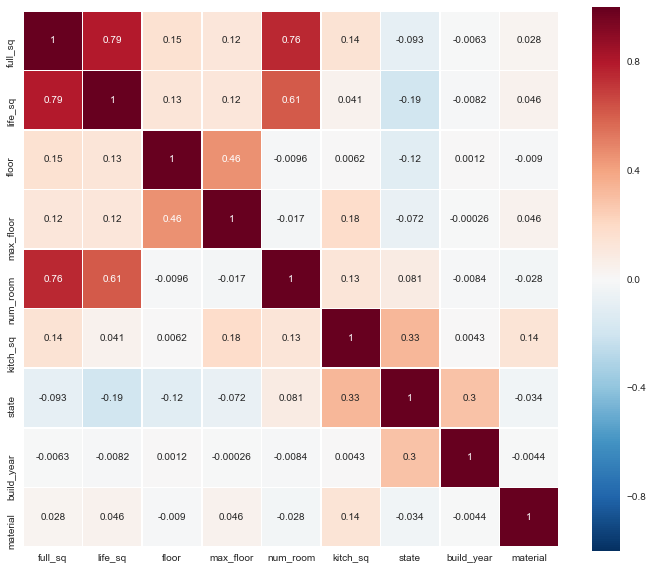

In [292]:
f, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(train_house_df[['full_sq' , 'life_sq' , 'floor' , 'max_floor' , 'num_room' , 'kitch_sq' , 'state' , 'build_year' , 'material']].corr(),linewidths=.5, ax=ax,square=True,annot=True);

In [97]:
merge_df.shape

(38075, 292)

In [98]:
label_df.shape

(30413,)

In [99]:
from sklearn.preprocessing import Imputer

imp  =  Imputer(missing_values='NaN' ,strategy='mean' , axis=1)

merge_df[imp_column] = imp.fit_transform(merge_df[imp_column])


In [100]:
merge_df['log_full_sq'] =  np.log1p(merge_df['full_sq'])
merge_df['log_life_sq'] =  np.log1p(merge_df['life_sq'])
merge_df['product_type'][merge_df['product_type'].isnull()]='Investment'

In [101]:
main_merge_df  =  merge_df[['log_full_sq' , 'log_life_sq' , 'floor' , 'max_floor' , 'num_room' , 'kitch_sq' , 'state' , 'house_age', 'material','product_type' , 'sub_area']]

In [179]:
from sklearn.preprocessing import LabelEncoder

def createDummy(df , var_mod):
    le = LabelEncoder()
    #var_mod = ['PROD_ABBR','STATE_ABBR' ]
    le = LabelEncoder()
    for i in var_mod:
        df[i] = le.fit_transform(df[i])

    #One Hot Coding:
    #df = pd.get_dummies(df, columns=var_mod)
    return df

In [103]:
other_column =  merge_df.columns.drop(imp_column)

In [104]:
cat_columns  = merge_df[other_column].select_dtypes(exclude=['float64' , 'int64']).columns

num_columns  = merge_df[other_column].select_dtypes(include=['float64' , 'int64']).columns

In [105]:
cat_columns

Index(['timestamp', 'product_type', 'sub_area', 'culture_objects_top_25',
       'thermal_power_plant_raion', 'incineration_raion',
       'oil_chemistry_raion', 'radiation_raion', 'railroad_terminal_raion',
       'big_market_raion', 'nuclear_reactor_raion', 'detention_facility_raion',
       'water_1line', 'big_road1_1line', 'railroad_1line', 'ecology'],
      dtype='object')

In [106]:
macro_cat_columns  = macro_df.select_dtypes(exclude=['float64' , 'int64']).columns

macro_num_columns  = macro_df.select_dtypes(include=['float64' , 'int64']).columns

In [107]:
from sklearn.preprocessing import Imputer

imp  =  Imputer(missing_values='NaN' ,strategy='mean' , axis=1)

macro_df[macro_num_columns] = imp.fit_transform(macro_df[macro_num_columns])

In [108]:
macro_num_columns_required=['oil_urals', 'balance_trade', 'balance_trade_growth', 'eurrub',
       'net_capital_export', 'micex_rgbi_tr', 'micex_cbi_tr', 'deposits_rate',
       'mortgage_value', 'rent_price_3room_bus', 'power_clinics',
       'seats_theather_rfmin_per_100000_cap']

In [109]:
macro_df.shape

(2484, 100)

In [110]:
len(num_columns)

268

In [111]:
imp  =  Imputer(missing_values='NaN' ,strategy='mean' , axis=1)

merge_df[num_columns] = imp.fit_transform(merge_df[num_columns])

In [180]:
num_columns_required = ['id','green_part_500', 'prom_part_500', 'office_sqm_500', 'trc_count_500',
       'trc_sqm_500', 'cafe_sum_500_min_price_avg',
       'cafe_count_500_price_1000', 'cafe_count_500_price_4000',
       'cafe_count_500_price_high', 'mosque_count_500', 'leisure_count_500',
       'sport_count_500', 'market_count_500', 'prom_part_1000',
       'office_sqm_1000', 'cafe_sum_1000_min_price_avg',
       'cafe_count_1000_price_high', 'mosque_count_1000', 'market_count_1000',
       'trc_sqm_1500', 'cafe_sum_1500_min_price_avg', 'mosque_count_1500',
       'cafe_sum_2000_min_price_avg', 'mosque_count_2000', 'market_count_2000',
       'mosque_count_3000', 'prom_part_5000', 'mosque_count_5000', 'female_f',
       '7_14_female', 'build_count_1971-1995', 'green_zone_km',
       'water_treatment_km', 'water_km', 'big_road1_km', 'railroad_km',
       'fitness_km', 'additional_education_km', 'church_synagogue_km',
       'catering_km']

In [181]:
len(num_columns_required)

41

In [182]:
len(cat_columns)

16

In [183]:
cat_columns

Index(['timestamp', 'product_type', 'sub_area', 'culture_objects_top_25',
       'thermal_power_plant_raion', 'incineration_raion',
       'oil_chemistry_raion', 'radiation_raion', 'railroad_terminal_raion',
       'big_market_raion', 'nuclear_reactor_raion', 'detention_facility_raion',
       'water_1line', 'big_road1_1line', 'railroad_1line', 'ecology'],
      dtype='object')

In [184]:
merge_df.shape

(38075, 294)

In [185]:
macro_df['child_on_acc_pre_school'][macro_df['child_on_acc_pre_school']=='#!']='18,200'

macro_df['child_on_acc_pre_school'][macro_df['child_on_acc_pre_school'].isnull()]='18,200'

macro_df['modern_education_share'][macro_df['modern_education_share'].isnull()]='93,17'

macro_df['old_education_build_share'][macro_df['old_education_build_share'].isnull()]='18,95'

In [186]:
main_merge_df.shape

(38075, 89)

In [187]:
main_merge_df[cat_columns] = merge_df[cat_columns]

main_merge_df[num_columns_required] = merge_df[num_columns_required]

In [188]:
main_merge_df.shape

(38075, 89)

In [189]:
macro_cat_columns

Index(['timestamp', 'child_on_acc_pre_school', 'modern_education_share',
       'old_education_build_share'],
      dtype='object')

In [190]:
#macro_col_required=macro_num_columns_required+['child_on_acc_pre_school' , 'modern_education_share' , 'old_education_build_share']
macro_col_required=macro_num_columns_required+macro_cat_columns.tolist()
len(macro_col_required)

16

In [191]:
merge_macro_df = pd.merge(main_merge_df, macro_df[macro_col_required], on='timestamp') 

In [192]:
merge_macro_df.shape

(38075, 104)

In [136]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics
%matplotlib inline
import matplotlib.pyplot as plt 
from sklearn.grid_search import GridSearchCV

def modelfitWithGridSearch(name , alg, dtrain, dvalidation , dtest, predictors, target, IDcol, tuned_parameters,rmse, cvNo):
    #Fit the algorithm on the data
    
    clf = GridSearchCV(alg, tuned_parameters, cv=cvNo, scoring='neg_mean_squared_error')
    
    clf.fit(dtrain[predictors], dtrain[target])
    
    print("Best parameters set found on development set:")
    print(clf.best_estimator_)
    
    print("Best Score"+str(clf.best_score_))
       
    #Predict training set:
    dtrain_predictions = clf.predict(dtrain[predictors])
    #print('predictors '+str(predictors))
        
    #Print model report:
    print ("\nModel Report")
    print ("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error(dtrain[target].values, dtrain_predictions)))
  
   
    
    dvalidation_predictions = clf.predict(dvalidation[predictors])
    dvalidation.loc[:,'PRED_'+str(target)+'_'+str(name)] = dvalidation_predictions
    print ("\nValidation Model Report")
    print ("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error(dvalidation[target].values, dvalidation_predictions)))
    
    print(len(rmse['ALG']))
    rmse.loc[len(rmse['ALG'])-1,'CVD_Best_Score'] =clf.best_score_
    rmse.loc[len(rmse['ALG'])-1,'Train_RMSE'] =np.sqrt(metrics.mean_squared_error(dtrain[target].values, dtrain_predictions))
    rmse.loc[len(rmse['ALG'])-1,'Test_RMSE']  =np.sqrt(metrics.mean_squared_error(dvalidation[target].values, dvalidation_predictions))
    
    
    #dvalidation[[target,'PRED_'+str(target)]].plot.area(figsize=(10,6) , stacked=False )

    dtest_predictions = clf.predict(dtest[predictors])
    dtest.loc[:,target] = dtest_predictions
    #dtest['Item_Outlet_Sales'] = np.exp(dtest_predictions)
    IDcol.append(target)
    submission = pd.DataFrame({ x: dtest[x].astype(int) for x in IDcol})
    filename = name+".csv"
    submission.to_csv(filename, index=False)

In [173]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics
%matplotlib inline
import matplotlib.pyplot as plt 

def executeModel(name , alg, dtrain, dvalidation , dtest, predictors, target, IDcol,rmse):
    #Fit the algorithm on the data
    
    alg.fit(dtrain[predictors], dtrain[target])
    
    print(alg.feature_importances_)
          

    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    #print('predictors '+str(predictors))
        
    #Print model report:
    print ("\nModel Report")
    print ("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error(dtrain[target].values, dtrain_predictions)))
    #print(alg.estimators_ )  
   
    
    dvalidation_predictions = alg.predict(dvalidation[predictors])
    dvalidation.loc[:,'PRED_'+str(target)+'_'+str(name)] = dvalidation_predictions
    print ("\nValidation Model Report")
    print ("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error(dvalidation[target].values, dvalidation_predictions)))
    
    print(len(rmse['ALG']))
    rmse.loc[len(rmse['ALG'])-1,'Train_RMSE'] =np.sqrt(metrics.mean_squared_error(dtrain[target].values, dtrain_predictions))
    rmse.loc[len(rmse['ALG'])-1,'Test_RMSE']  =np.sqrt(metrics.mean_squared_error(dvalidation[target].values, dvalidation_predictions))
    
    
    #dvalidation[[target,'PRED_'+str(target)]].plot.area(figsize=(10,6) , stacked=False )

    dtest_predictions = alg.predict(dtest[predictors])
    dtest.loc[:,target] = dtest_predictions
    #dtest['Item_Outlet_Sales'] = np.exp(dtest_predictions)
    IDcol.append(target)
    submission = pd.DataFrame({ x: dtest[x].astype(int) for x in IDcol})
    filename = name+".csv"
    submission.to_csv(filename, index=False)

In [174]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor


def ridge(train_agency_df, test_agency_df,target,IDcol,rmse,cvNo):
    removeColumn =['MAX_AGE' , 'PRD_ERND_PREM_AMT' ,'MIN_AGE' ,'WRTN_PREM_AMT' ,'MONTHS'  'NB_WRTN_PREM_AMT' ,'POLY_INFORCE_QTY' ]
    predictors = [x for x in train_agency_df.columns if x not in [target]+IDcol+removeColumn]
    param_grid = {
                  "alpha": [1e-20, 1e-15, 1e-10,1e-5, 0.0001 , 0.001 , 0.01  , 0.1]

                  }

    alg2 = Ridge(alpha=0.001, normalize=True ,  fit_intercept=True, max_iter=100)
    modelfitWithGridSearch("ridge",alg2, train_agency_df, test_agency_df , None, predictors, target, IDcol, param_grid,rmse,cvNo)
    


def lasso(train_agency_df, test_agency_df,target,IDcol,rmse,cvNo):
    removeColumn =['MA_AGE' , 'PRD_ERND_PREM_AMT' ,'MIN_AGE' ,'WRTN_PREM_AMT' ,'MONTHS' ,'NB_WRTN_PREM_AMT' ,'POLY_INFORCE_QTY'  ]
    predictors = [x for x in train_agency_df.columns if x not in [target]+IDcol+removeColumn]
    param_grid = {
                  "alpha": [1e-2,  1, 5, 10 , 20]

                  }

    alg2 = Lasso(normalize=True ,  fit_intercept=True )
    modelfitWithGridSearch("lasso",alg2, train_agency_df, test_agency_df , None, predictors, target, IDcol, param_grid,rmse,cvNo)  
    
def decisionTreeRegressor(train_agency_df, test_agency_df,target,IDcol,rmse,cvNo):
    removeColumn =['NB_WRTN_PREM_AMT','POLY_INFORCE_QTY']
    predictors = [x for x in train_agency_df.columns if x not in [target]+IDcol+removeColumn]

    param_grid = {"criterion": ["mse"],
                  "min_samples_split": [10 , 20  ],
                  #"max_depth": [ 10 ,20 , 30],
                  "min_samples_leaf": [5, 10 ]
                  }

    alg3 = DecisionTreeRegressor()
    modelfitWithGridSearch("DecisionTree",alg3, train_agency_df, test_agency_df , None, predictors, target, IDcol, param_grid,rmse,cvNo)    
    
def randomForestRegressor(train_agency_df,validation_agency_df, test_agency_df,target,IDcol,rmse,cvNo):
    removeColumn =['NB_WRTN_PREM_AMT','POLY_INFORCE_QTY']
    predictors = [x for x in train_agency_df.columns if x not in [target]+IDcol+removeColumn]

    param_grid = {"criterion": ["mse"],
                  "n_estimators":[100],
                  "oob_score":["True"],
                  #"max_depth":[10,15,20],
                  #"min_samples_split":[5],
                   "max_features" : ["auto"]
                  }
    if (cvNo!=0) :
        alg3 = RandomForestRegressor()
        modelfitWithGridSearch("RandomForest",alg3, train_agency_df, validation_agency_df,test_agency_df , predictors, target, IDcol,param_grid,rmse,cvNo)   
    else:
        alg3 = RandomForestRegressor(n_estimators=100 , oob_score=True )
        executeModel("RandomForest",alg3, train_agency_df,validation_agency_df, test_agency_df , predictors, target, IDcol,rmse) 
    
def gradientBoostingRegressor(train_agency_df,validation_agency_df, test_agency_df,target,IDcol,rmse,cvNo):
    removeColumn =[ ]
    predictors = [x for x in train_agency_df.columns if x not in [target]+IDcol+removeColumn]

    param_grid = { 
                   "loss" :["ls"],
                 # "alpha": [0.5,  0.9, 1.5],
                  "min_samples_split": [10],
                  "max_depth":[5],
                  "n_estimators":[100], 
                  'min_samples_leaf': [5]
                  }

    alg3 = GradientBoostingRegressor(min_samples_split=10 ,max_depth=10 , n_estimators=500 , min_samples_leaf=5 )
    
    if (cvNo!=0) :
        alg3 = GradientBoostingRegressor()
        modelfitWithGridSearch("GBM",alg3, train_agency_df,validation_agency_df, test_agency_df , predictors, target, IDcol,param_grid,rmse,cvNo)
    else:
        alg3 = GradientBoostingRegressor(min_samples_split=10 ,max_depth=10 , n_estimators=500 , min_samples_leaf=5 )
        executeModel("GBM",alg3, train_agency_df,validation_agency_df, test_agency_df , predictors, target, IDcol,rmse) 

In [142]:
import datetime
rmse_data = {'ALG':[] , 'CVD_Best_Score':[] , 'Train_RMSE':[] ,'Test_RMSE':[] }
rmse = pd.DataFrame(rmse_data)
index = 0

def best_fit_model_ensemble_regression(train_agency_df, validation_df,test_agency_df , target, IDcol,cvNo,index):
    #print("------------ Algorithm :- [Random Forest]----------------------------------")
    #print(datetime.datetime.now().time())
    index= index +1;
    #rmse.loc[index,'ALG']='Random Forest'
    #randomForestRegressor(train_agency_df,validation_df, test_agency_df , target, IDcol,rmse,cvNo)
    print("------------ Algorithm :- [Gradient Boosting Regression]----------------------------------")
    
    print(datetime.datetime.now().time())
    index= index +1;
    rmse.loc[index,'ALG']='Gradient Boosting'
    gradientBoostingRegressor(train_agency_df, validation_df,test_agency_df , target, IDcol,rmse,cvNo)

       #print("-!!!!!--Best RMSE--!!!!--"+rmse.sort_values('Test_RMSE').head(1))

    return rmse   

In [284]:
selected_columns = important_columns.loc[important_columns['imp'].sort_values(ascending=False).index]['predictor'].head(50).tolist()
selected_columns

['log_full_sq',
 'mkad_km',
 'build_count_panel',
 'floor',
 'culture_objects_top_25',
 'mosque_km',
 'trc_sqm_3000',
 'office_km',
 'house_age',
 'industrial_km',
 'catering_km',
 'cafe_count_1000_price_high',
 'leisure_count_500',
 'water_km',
 'trc_sqm_1500',
 'railroad_km',
 'eurrub',
 'cemetery_km',
 'cafe_sum_2000_min_price_avg',
 'green_zone_km',
 'kindergarten_km',
 'micex_rgbi_tr',
 'max_floor',
 'state',
 'fitness_km',
 'build_count_1971-1995',
 'cafe_count_500_price_1000',
 'mosque_count_5000',
 'ecology',
 '7_14_female',
 'young_female',
 'micex_cbi_tr',
 'build_count_block',
 'prom_part_1000',
 'church_synagogue_km',
 'big_road1_km',
 'office_sqm_500',
 'build_count_monolith',
 'net_capital_export',
 '16_29_female',
 'material',
 'mosque_count_3000',
 'additional_education_km',
 'office_sqm_1000',
 'product_type',
 'prom_part_5000',
 'sport_count_500',
 'green_part_3000',
 'oil_urals',
 'mosque_count_1500']

In [298]:
merge_macro_df['full_sq'].plot()

KeyError: 'full_sq'

In [295]:
from sklearn.cross_validation import train_test_split
from sklearn.decomposition import PCA
import datetime

all_feature_columns = merge_macro_df.columns.tolist()

all_feature_columns.remove('timestamp')

rowid=merge_macro_df['id'] 


model_house_df = merge_macro_df[selected_columns]

cat_columns_model  = model_house_df.select_dtypes(exclude=['float64' , 'int64']).columns

num_columns_model = model_house_df.select_dtypes(include=['float64' , 'int64']).columns

print(model_house_df.shape)
var_mod = cat_columns_model.tolist()
model_house_df = createDummy(model_house_df,var_mod)
print("After Dummay Coding Shape"+str(model_house_df.shape))

#model_house_df[num_columns_model] = preprocessing.scale(model_house_df[num_columns_model])
#pca = PCA(n_components=60)
#pca_house_df_reduced = pca.fit_transform(model_house_df)
#pca_reduced_df = pd.DataFrame(pca_house_df_reduced, columns=['pca_'+ str(i) for i in range(0,60)])
#pca_reduced_df['id']=rowid

#print("PCA Reduced :"+str(pca_reduced_df.shape))

#train_house_pca_df  = pca_reduced_df.loc[0:30412]
#train_house_pca_df['price_doc'] = label_df.values
#test_pca_df  = pca_reduced_df.loc[30413:38075]
#train_pca_df, validation_pca_df = train_test_split(train_house_pca_df, train_size = 0.8)


train_house_model_df  = model_house_df.loc[0:30412]
train_house_model_df['price_doc'] = (label_df.values/train_house_model_df['log_full_sq'])
test_model_df  = model_house_df.loc[30413:38075]
train_model_df, validation_model_df = train_test_split(train_house_model_df, train_size = 0.8)



print('--Model Start----')
print(datetime.datetime.now().time())
target = 'price_doc'
IDcol = ['id']
index=0
#rmse  = best_fit_model_ensemble_regression(train_pca_df,validation_pca_df, test_pca_df, target, IDcol, 10,index)

removeColumn =[ ]
predictors = [x for x in train_model_df.columns if x not in [target]+IDcol+removeColumn]

alg = GradientBoostingRegressor(min_samples_split=10 ,max_depth=10 , min_samples_leaf=5, n_estimators=500 )

alg.fit(train_model_df[predictors], train_model_df[target])

#Predict training set:
dtrain_predictions = alg.predict(train_model_df[predictors])
#print('predictors '+str(predictors))

#Print model report:
print ("\nModel Report")
print ("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error((train_model_df[target].values*train_model_df['log_full_sq']), (dtrain_predictions*train_model_df['log_full_sq']))))
print(alg.decision_function)
    
dvalidation_predictions = alg.predict(validation_model_df[predictors])
validation_model_df.loc[:,'PRED_'+str(target)] = np.expm1(dvalidation_predictions)
print ("\nValidation Model Report")
print ("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error((validation_model_df[target].values*validation_model_df['log_full_sq']), (dvalidation_predictions*validation_model_df['log_full_sq']))))
print('--Model End----')
print(datetime.datetime.now().time())

(38075, 50)
After Dummay Coding Shape(38075, 50)
--Model Start----
18:28:44.311946


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

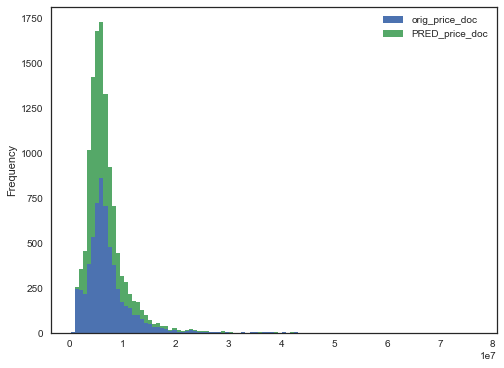

In [290]:
validation_model_df['orig_price_doc'] = np.expm1(validation_model_df['price_doc'])

validation_model_df[['orig_price_doc','PRED_price_doc']].plot.hist(stacked=True , bins=100 , figsize= (8,6) )

In [291]:
validation_model_df[['orig_price_doc','PRED_price_doc']].describe()

,orig_price_doc,PRED_price_doc
count,6.083000e+03,6.083000e+03
mean,7.094650e+06,6.583907e+06
std,4.729812e+06,3.693991e+06
min,2.000000e+05,9.776936e+05
25%,4.700000e+06,4.514914e+06
50%,6.200000e+06,5.736799e+06
75%,8.200000e+06,7.471684e+06
max,7.700000e+07,6.065989e+07


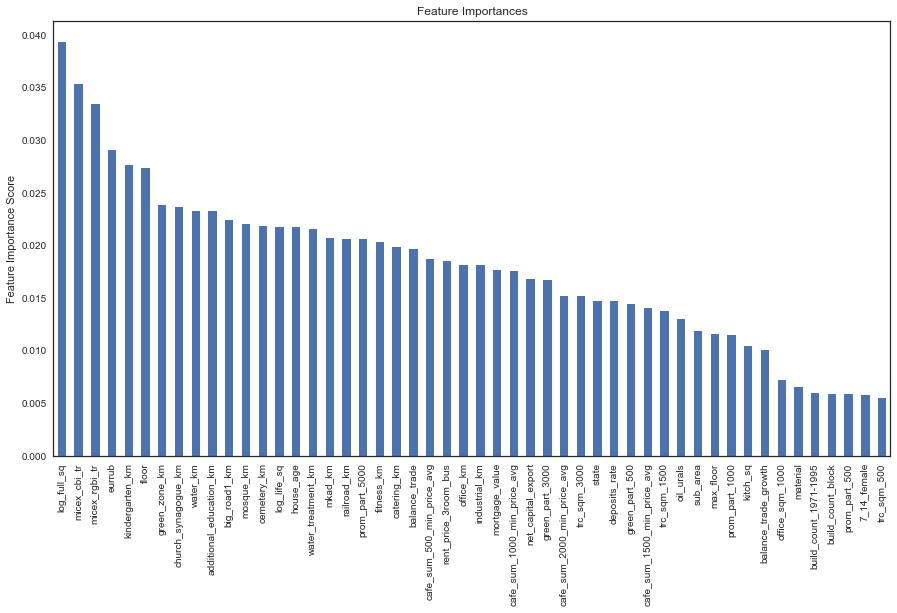

In [283]:
feat_imp = pd.Series(alg.feature_importances_, predictors).sort_values(ascending=False)
feat_imp.head(50).plot(kind='bar', title='Feature Importances' ,figsize= (15,8)  )
plt.ylabel('Feature Importance Score')
        
    

In [212]:
important_columns = pd.DataFrame(columns=['imp','predictor'] )
important_columns

important_columns['imp'] = alg.feature_importances_
#[alg.feature_importances_, predictors] 

In [214]:
important_columns['predictor'] = predictors

In [63]:
pca_reduced_df.head()

,pca_0,pca_1,pca_2,pca_3,pca_4,pca_5,pca_6,pca_7,pca_8,pca_9,pca_10,pca_11,pca_12,pca_13,pca_14,pca_15,pca_16,pca_17,pca_18,pca_19,pca_20,pca_21,pca_22,pca_23,pca_24,pca_25,pca_26,pca_27,pca_28,pca_29,pca_30,pca_31,pca_32,pca_33,pca_34,pca_35,pca_36,pca_37,pca_38,pca_39,pca_40,pca_41,pca_42,pca_43,pca_44,pca_45,pca_46,pca_47,pca_48,pca_49,pca_50,pca_51,pca_52,pca_53,pca_54,pca_55,pca_56,pca_57,pca_58,pca_59,id
0,1.947352,-7.558688,-4.813447,4.385314,5.386629,1.428108,-1.293098,3.712942,-2.263203,0.326876,-1.089535,0.058495,-2.797233,-1.016353,-0.656063,2.039077,-0.633044,-0.089860,-1.332358,-3.121896,-0.452280,-0.754303,1.969165,-0.175914,1.740864,1.007529,-1.523749,0.617329,0.674635,0.765826,1.328421,0.029861,1.029985,0.909755,-1.448659,-0.897570,1.051223,-0.556680,0.591846,-2.606044,-0.703024,0.345159,0.124198,0.488042,-0.556388,-0.553990,-0.059128,-0.697996,-0.110491,-0.546714,0.534795,0.865486,-0.751075,0.266597,-0.442545,-1.732623,-0.229799,0.890089,-0.343303,-1.122263,1.0
1,1.798419,-7.509954,-3.767407,0.857591,4.945634,1.982987,-1.011284,3.229270,-0.505802,-0.203239,0.096041,-0.434184,-0.380562,-1.315609,-0.734619,-0.695669,-1.158092,-1.754299,2.168779,-2.524657,-0.460555,2.903680,0.955905,0.139032,1.650932,2.511534,-1.032076,-0.627131,-0.177572,0.614740,1.747038,0.270012,1.236230,-0.510428,-0.837056,0.432981,-0.951066,-0.342266,0.126195,-0.107767,-0.357158,-0.351941,-0.284294,0.285119,2.083325,-0.491026,-0.361329,-1.257683,-0.451304,-0.226637,1.693146,1.212496,0.257530,-0.305583,-0.437963,-0.480927,-0.027241,0.256904,0.859548,-0.632942,2.0
2,0.597862,-7.592519,-4.713488,-0.106388,5.151075,2.934303,0.205340,3.475125,-0.627177,-0.332188,-0.635767,0.465087,2.751195,-5.296102,0.050170,-1.613656,-0.182774,-0.176863,0.649003,-0.299899,2.071764,0.543455,1.894179,-0.261403,1.268444,1.139323,-1.824078,-0.204425,-0.723465,-0.963670,1.231605,-0.102727,1.185481,-0.442837,-1.239706,0.832025,-0.381841,0.147294,0.445908,-0.420584,-0.705266,0.310495,0.067072,0.568150,1.092775,-0.078161,0.092610,-0.070726,-0.615926,-0.922104,-0.548281,0.334808,0.436351,-0.297422,0.907656,-0.193662,-0.509526,0.500087,-0.512684,-1.309420,3.0
3,0.269071,-7.752770,-5.908064,7.800465,5.938656,-1.639482,-2.667447,4.745898,-2.208121,0.902550,-0.723146,-0.111376,-1.946833,0.208350,0.184897,-0.705584,0.125524,1.588806,-0.013421,2.190801,0.808279,-0.365277,1.318989,-0.350345,0.943941,-0.117058,-2.089197,-1.644275,0.106457,0.276945,2.159616,-0.123058,-0.914624,-0.025403,-1.095347,0.274794,0.097087,-0.197511,0.024348,0.233821,-0.501252,-0.644778,-0.068515,-0.380654,-0.686067,-1.194322,-0.150140,-0.562724,-1.026018,0.173371,-0.326423,0.676472,-0.842275,-0.800176,0.830776,-0.932291,-1.286366,-0.181133,0.434513,-0.378045,4.0
4,26.009687,-8.268048,10.036782,-0.169984,5.771913,4.626333,2.037516,4.509860,-1.126159,2.541689,-5.686374,0.794262,0.221234,2.903497,-0.259572,-2.881774,-1.113576,1.999040,-0.204417,1.193937,0.085391,-0.571975,1.722289,-1.082099,0.699482,3.144186,-1.493027,0.529019,3.964761,1.773702,2.898687,-1.337716,-3.233871,-2.513654,2.318592,2.444975,0.356392,-1.293368,-2.460606,-0.924718,-0.796787,2.150876,0.825676,1.099944,-0.165341,-2.341148,-0.407633,-0.820569,1.448190,1.739008,0.954058,-0.217953,0.567790,-0.761384,1.418553,0.605659,0.238849,1.655692,-0.146019,-0.742236,5.0


In [ ]:
test_pca_df['price_doc'].describe()

In [ ]:
train_house_df['price_doc'].describe()

In [ ]:
plt.figure(figsize=(12,8))
sns.distplot(test_pca_df.price_doc.values, bins=50, kde=True)
plt.xlabel('price', fontsize=12)
plt.show()

In [ ]:
plt.figure(figsize=(12,8))
sns.distplot(train_pca_df.price_doc.values, bins=50, kde=True)
plt.xlabel('price', fontsize=12)
plt.show()